#                            Big Mart Sales Prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
Train = pd.read_csv("C:\\Users\\bhara\\Downloads\\bigmart sales\\train.csv")
Test =pd.read_csv("C:\\Users\\bhara\\Downloads\\bigmart sales\\test.csv")

In [26]:
Train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [27]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null category
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: category(1), float64(4), object(7)
memory usage: 741.2+ KB


# Missing values imputation

In [28]:
#Missing values imputation

In [29]:
Train.isnull().sum().sort_values(ascending = False)

Item_Outlet_Sales            0
Outlet_Type                  0
Outlet_Location_Type         0
Outlet_Size                  0
Outlet_Establishment_Year    0
Outlet_Identifier            0
Item_MRP                     0
Item_Type                    0
Item_Visibility              0
Item_Fat_Content             0
Item_Weight                  0
Item_Identifier              0
dtype: int64

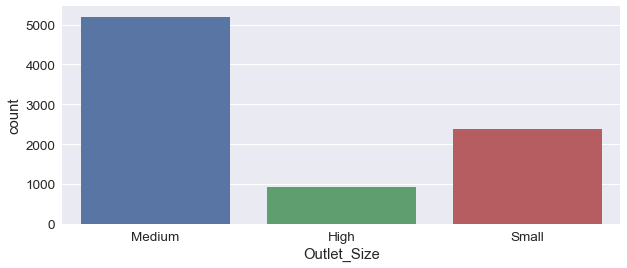

In [30]:
Train.Outlet_Size.value_counts()
plt.subplots(figsize=(10,4))
sns.countplot(Train['Outlet_Size'])

In [31]:
#So filling the missing values with medium
Train["Outlet_Size"] = Train["Outlet_Size"].fillna('Medium')

In [32]:
#Item weight should be filled with mean since it a continuous value
Train['Item_Weight']=Train['Item_Weight'].fillna(Train['Item_Weight'].mean())

In [33]:
#make sure that all the missing values are imputed
Train.isnull().sum().any()

False

In [34]:
num_col = Train._get_numeric_data()
num_col.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.30,0.016047,249.8092,3735.1380
1,5.92,0.019278,48.2692,443.4228
2,17.50,0.016760,141.6180,2097.2700
3,19.20,0.000000,182.0950,732.3800
4,8.93,0.000000,53.8614,994.7052


In [35]:
#so here 'Outlet_Establishment_Year' is basically not an integer so convert it back to categorical
Train.Outlet_Establishment_Year = pd.Categorical(Train.Outlet_Establishment_Year)

In [36]:
num_cols=Train._get_numeric_data()
num_cols.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

# Out liers detection and removimg them

In [37]:

# Writing a function to find percentiles, min and max values of the attributes
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_cols.apply(lambda x: var_summary(x)).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Item_Weight,8523.0,0.0,1.095857e+05,12.857645,12.857645,4.226124,1.786012e+01,4.555,5.175000,6.1300,7.004000,9.310000,12.857645,16.000000,19.100000,20.19000,20.850000,21.350000
Item_Visibility,8523.0,0.0,5.636433e+02,0.066132,0.053931,0.051598,2.662335e-03,0.000,0.000000,0.0000,0.012042,0.026989,0.053931,0.094585,0.139514,0.16378,0.226249,0.328391
Item_MRP,8523.0,0.0,1.201681e+06,140.992782,143.012800,62.275067,3.878184e+03,31.290,35.062752,42.5167,52.795600,93.826500,143.012800,185.643700,231.200480,250.76924,263.022600,266.888400
Item_Outlet_Sales,8523.0,0.0,1.809153e+07,2122.671407,1794.331000,1544.093277,2.384224e+06,33.290,83.890800,188.4214,343.552800,834.247400,1794.331000,3101.296400,4570.051200,5522.81100,5522.811000,5522.811000


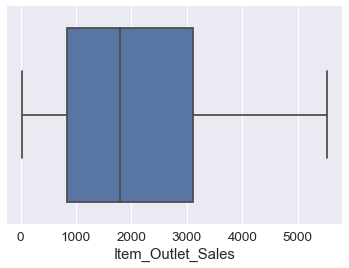

In [38]:
sns.boxplot(num_cols['Item_Outlet_Sales'])

In [39]:
#so There are outliers lets remove them
num_cols['Item_Outlet_Sales']= num_cols['Item_Outlet_Sales'].clip_upper(num_cols['Item_Outlet_Sales'].quantile(0.95))

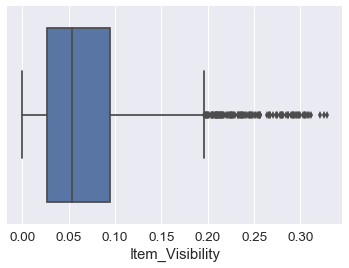

In [40]:
sns.boxplot(num_cols['Item_Visibility'])

# Finding correlaton with respect to "Item_Outlet_Sales"

In [41]:
#finding correlation for numaric columns with respect to Item_Outlet_Sales
corr = num_col.corr()["Item_Outlet_Sales"]
corr[np.argsort(corr,axis=1)].sort_values(ascending = False)

Item_Outlet_Sales    1.000000
Item_MRP             0.576802
Item_Weight          0.012773
Item_Visibility     -0.134678
Name: Item_Outlet_Sales, dtype: float64

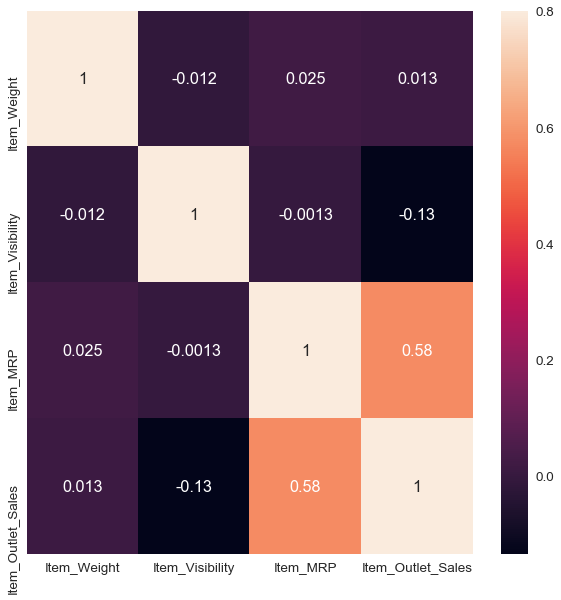

In [42]:
#using heat ma
cm =num_col.corr()
sns.set(font_scale=1.35)
f, ax = plt.subplots(figsize=(10,10))
hm=sns.heatmap(cm, annot = True, vmax =.8)

In [43]:
#Damn thre is one attribute which is negatively correlated so we need to kick that out.
num_cols =num_col.drop(["Item_Visibility"], axis =1)


# Checking For multicorrelation

In [44]:
#lets check multi correlation using VIF(Varience Inflation Factor)
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [45]:
# Performing OLS to know the significant attributes
lm = smf.ols('Item_Outlet_Sales ~ Item_MRP+Item_Weight', num_cols).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     2124.
Date:                Fri, 15 Dec 2017   Prob (F-statistic):               0.00
Time:                        10:40:37   Log-Likelihood:                -72947.
No. Observations:                8523   AIC:                         1.459e+05
Df Residuals:                    8520   BIC:                         1.459e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     113.1931     53.012      2.135      0.033       9.276     217.110
Item_MRP       14.3026      0.219     65.160      0.000      13.872      14.733
Item_Weight    -0.5508      3.234     -0.170      0.865      -6.891       5.790
==============================================================================
Omnibus:                        1.525   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.467   Jarque-Bera (JB):                1.527
Skew:                           0.033   Prob(JB):                        0.466
Kurtosis:                       2.996   Cond. No.                         600.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
num_cols['intercept'] = lm.params[0]

In [47]:
for i in range(3):
    print (vif(num_cols[['Item_MRP','Item_Weight','intercept']].as_matrix(), i))

1.00061324038
1.00061324038
15.0513780962


In [48]:
np.diag(np.linalg.inv(num_cols[['Item_MRP','Item_Weight','intercept']].corr().as_matrix()),0)

array([ 1.00061324,  1.00061324,  1.        ])

In [49]:
Final_Num_Cols = num_cols.drop(["Item_Weight"],axis =1)

In [50]:
Final_Num_Cols.columns

Index(['Item_MRP', 'Item_Outlet_Sales', 'intercept'], dtype='object')

# Dealing with Categorical attributes

In [51]:
cat_col = Train.drop(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'],axis = 1)
cat_col.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [52]:
#Item_Identifier is just like seriel number so just ignore it, i mean drop it.
cat_cols =cat_col.drop(['Item_Identifier'], axis =1)

# Visualization for categorical attrebutes to know their value counts

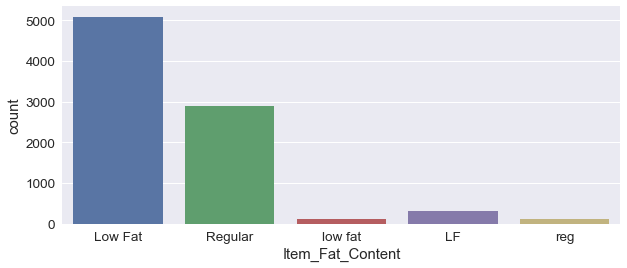

In [53]:
plt.subplots(figsize=(10,4))
sns.countplot(cat_cols['Item_Fat_Content'])

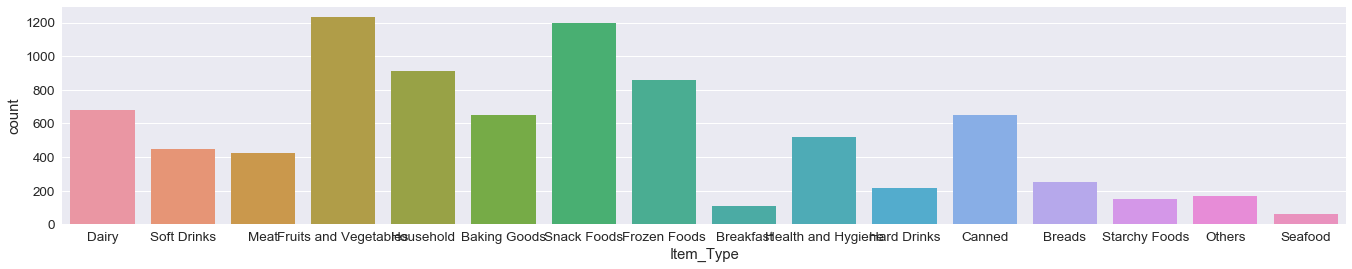

In [54]:
plt.subplots(figsize=(23,4))
sns.countplot(cat_cols.Item_Type)

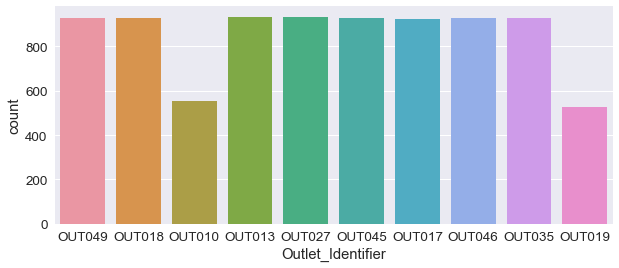

In [55]:
plt.subplots(figsize=(10,4))
sns.countplot(cat_cols.Outlet_Identifier)

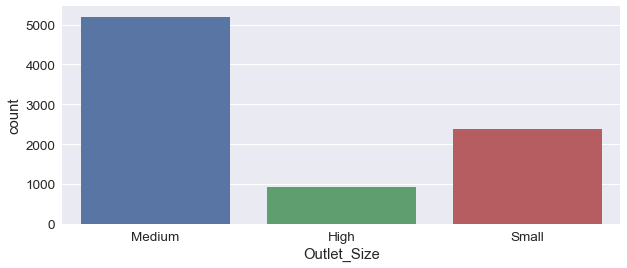

In [56]:
plt.subplots(figsize=(10,4))
sns.countplot(cat_cols.Outlet_Size)

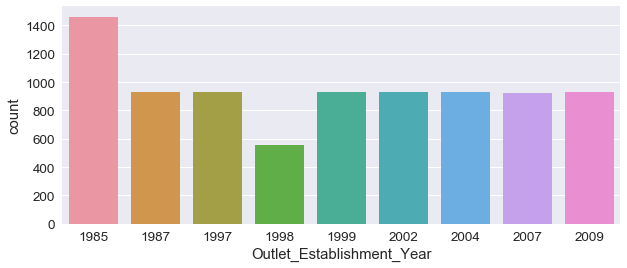

In [57]:
plt.subplots(figsize=(10,4))
sns.countplot(Train.Outlet_Establishment_Year)

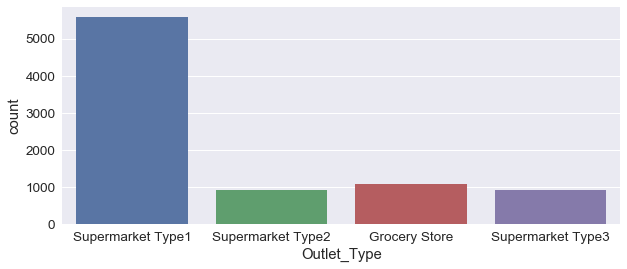

In [58]:
plt.subplots(figsize=(10,4))
sns.countplot(cat_cols.Outlet_Type)

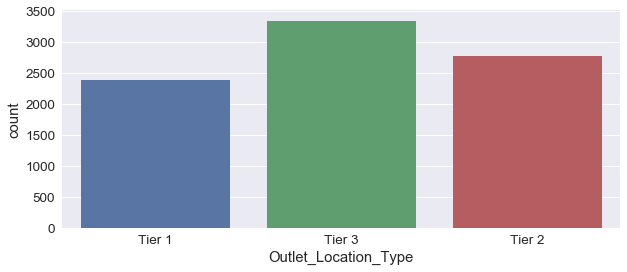

In [59]:
plt.subplots(figsize=(10,4))
sns.countplot(cat_cols.Outlet_Location_Type)

# Using visualization check how categorical columns varies with target variable

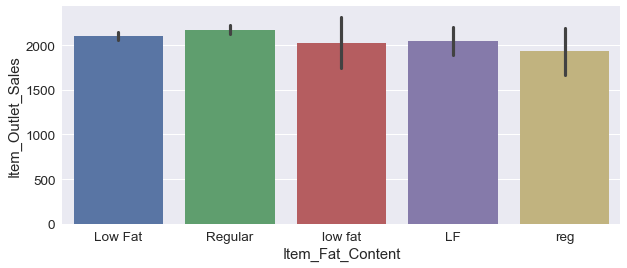

In [60]:
plt.subplots(figsize = (10,4))
sns.barplot(x = cat_cols['Item_Fat_Content'], y= num_cols['Item_Outlet_Sales'])

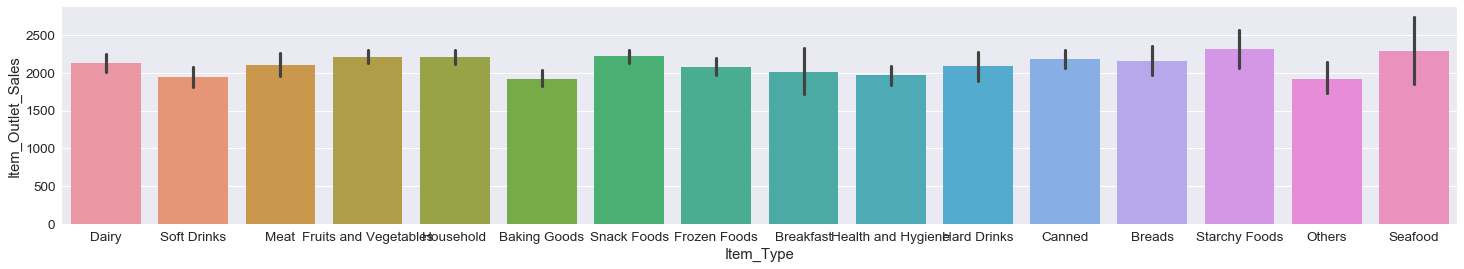

In [61]:
plt.subplots(figsize = (25,4))
sns.barplot(x = cat_cols['Item_Type'], y= num_cols['Item_Outlet_Sales'])

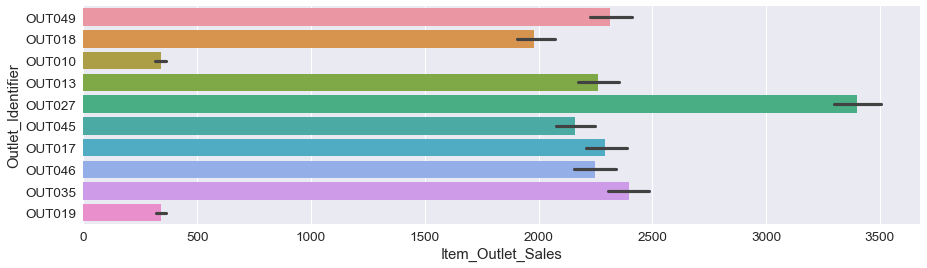

In [62]:
plt.subplots(figsize = (15,4))
sns.barplot(y = cat_cols['Outlet_Identifier'], x= num_cols['Item_Outlet_Sales'])

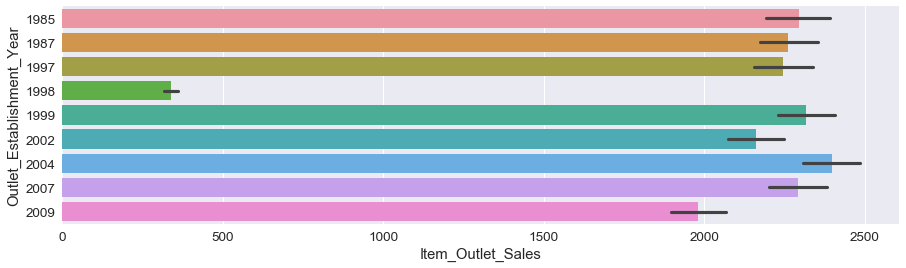

In [63]:

plt.subplots(figsize = (15,4))
sns.barplot(y = cat_cols['Outlet_Establishment_Year'], x= num_cols['Item_Outlet_Sales'])

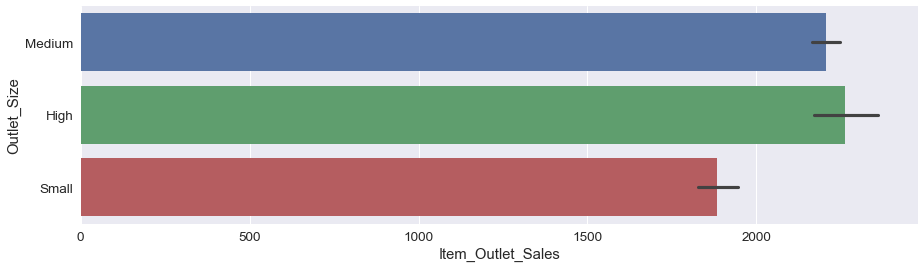

In [64]:
plt.subplots(figsize = (15,4))
sns.barplot(y = cat_cols['Outlet_Size'], x= num_cols['Item_Outlet_Sales'])

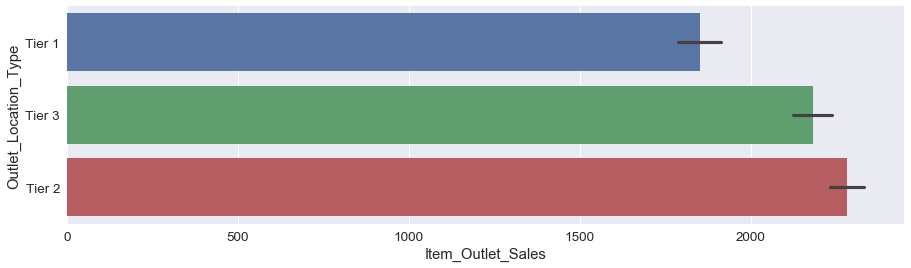

In [65]:
plt.subplots(figsize = (15,4))
sns.barplot(y = cat_cols['Outlet_Location_Type'], x= num_cols['Item_Outlet_Sales'])

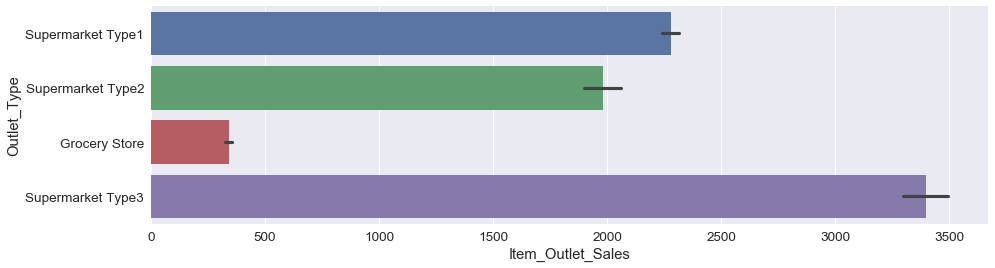

In [66]:
plt.subplots(figsize = (15,4))
sns.barplot(y = cat_cols['Outlet_Type'], x= num_cols['Item_Outlet_Sales'])

# To find the significant attributes we do ANOVA or F-Test

In [67]:
cat_cols.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [68]:
# we should add Item_Outlet_Sales as categorical attributes does not have target.
categorical_col =pd.concat([cat_cols,Final_Num_Cols.Item_Outlet_Sales],axis=1)
categorical_col.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [69]:
##Now we need to do stats model.api:

import statsmodels.api as sm
import statsmodels.formula.api as smf

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [70]:
lm1 = smf.ols('Item_Outlet_Sales ~Item_Fat_Content+Item_Type+Outlet_Identifier+Outlet_Establishment_Year+Outlet_Size+Outlet_Location_Type+Outlet_Type', categorical_col).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     105.4
Date:                Fri, 15 Dec 2017   Prob (F-statistic):               0.00
Time:                        10:40:54   Log-Likelihood:                -73400.
No. Observations:                8523   AIC:                         1.469e+05
Df Residuals:                    8494   BIC:                         1.471e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           5.964e+13   7.37e+14      0.081      0.935   -1.38e+15     1.5e+15
Item_Fat_Content[T.Low Fat]           28.1266     77.413      0.363      0.716    -123.621     179.874
Item_Fat_Content[T.Regular]           90.6092     80.384      1.127      0.260     -66.964     248.182
Item_Fat_Content[T.low fat]          -16.8108    147.005     -0.114      0.909    -304.977     271.355
Item_Fat_Content[T.reg]              -88.0480    145.142     -0.607      0.544    -372.562     196.466
Item_Type[T.Breads]                  213.1940     99.114      2.151      0.032      18.907     407.481
Item_Type[T.Breakfast]               157.3428    137.559      1.144      0.253    -112.306     426.992
Item_Type[T.Canned]                  216.6225     74.017      2.927      0.003      71.530     361.715
Item_Type[T.Dairy]                   232.2969     73.195      3.174      0.002      88.818     375.776
Item_Type[T.Frozen Foods]            134.4501     69.402      1.937      0.053      -1.594     270.494
Item_Type[T.Fruits and Vegetables]   268.3430     64.672      4.149      0.000     141.571     395.116
Item_Type[T.Hard Drinks]             160.7951    106.412      1.511      0.131     -47.799     369.389
Item_Type[T.Health and Hygiene]       59.7339     80.151      0.745      0.456     -97.381     216.849
Item_Type[T.Household]               305.1173     70.433      4.332      0.000     167.051     443.184
Item_Type[T.Meat]                    191.3836     83.292      2.298      0.022      28.111     354.657
Item_Type[T.Others]                  109.1824    116.283      0.939      0.348    -118.761     337.126
Item_Type[T.Seafood]                 417.2239    174.703      2.388      0.017      74.765     759.683
Item_Type[T.Snack Foods]             269.5634     65.017      4.146      0.000     142.114     397.013
Item_Type[T.Soft Drinks]              25.0605     82.792      0.303      0.762    -137.232     187.353
Item_Type[T.Starchy Foods]           323.6823    121.519      2.664      0.008      85.476     561.889
Outlet_Identifier[T.OUT013]         6.198e+14   3.22e+15      0.192      0.847    -5.7e+15    6.93e+15
Outlet_Identifier[T.OUT017]         1.786e+14   3.28e+14      0.545      0.586   -4.64e+14    8.21e+14
Outlet_Identifier[T.OUT018]           1.5e+15   2.68e+15      0.560      0.576   -3.75e+15    6.75e+15
Outlet_Identifier[T.OUT019]        -1.061e+15   2.35e+15     -0.451      0.652   -5.68e+15    3.55e+15
Outlet_Identifier[T.OUT027]        -4.226e+14   7.67e+14     -0.551      0.582   -1.93e+15    1.08e+15
Outlet_Identifier[T.OUT035]        -4.025e+14   1.39e+15     -0.289      0.772   -3.13e+15    2.33e+15
Outlet_Identifier[T.OUT045]         2.521e+14    4.5e+14      0.560      0.575    -6.3e+14    1.

# 1.Item_Fat_Content

In [71]:
import scipy.stats as stats

In [72]:
cat_cols.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [73]:
s1 = categorical_col.Item_Outlet_Sales[categorical_col.Item_Fat_Content=="Low Fat"]
s2 = categorical_col.Item_Outlet_Sales[categorical_col.Item_Fat_Content=="Regular"]
s3 = categorical_col.Item_Outlet_Sales[categorical_col.Item_Fat_Content=="LF"]
s4 = categorical_col.Item_Outlet_Sales[categorical_col.Item_Fat_Content=="reg"]
s5 = categorical_col.Item_Outlet_Sales[categorical_col.Item_Fat_Content=="low fat"]

In [74]:
stats.f_oneway(s1, s2, s3, s4,s5)

F_onewayResult(statistic=1.7628367310426605, pvalue=0.1333079866732248)

# 2.Item_Type

In [75]:
cat_cols.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [76]:
s1 = categorical_col.Item_Outlet_Sales[categorical_col.Item_Type=="Fruits and Vegetables"]
s2 = categorical_col.Item_Outlet_Sales[categorical_col.Item_Type=="Snack Foods"]
s3 = categorical_col.Item_Outlet_Sales[categorical_col.Item_Type=="Household"]
s4 = categorical_col.Item_Outlet_Sales[categorical_col.Item_Type=="Frozen Foods"]
s5 = categorical_col.Item_Outlet_Sales[categorical_col.Item_Type=="Dairy"]
s6 = categorical_col.Item_Outlet_Sales[categorical_col.Item_Type=="Canned"]
s7 = categorical_col.Item_Outlet_Sales[categorical_col.Item_Type=="Baking Goods"]
s8 = categorical_col.Item_Outlet_Sales[categorical_col.Item_Type=="Health and Hygiene"]
s9 = categorical_col.Item_Outlet_Sales[categorical_col.Item_Type=="Soft Drinks"]
s10 = categorical_col.Item_Outlet_Sales[categorical_col.Item_Type=="Meat"]
s11 = categorical_col.Item_Outlet_Sales[categorical_col.Item_Type=="Breads"]
s12 = categorical_col.Item_Outlet_Sales[categorical_col.Item_Type=="Hard Drinks"]
s13 = categorical_col.Item_Outlet_Sales[categorical_col.Item_Type=="Others"]
s14 = categorical_col.Item_Outlet_Sales[categorical_col.Item_Type=="Starchy Foods"]
s15 = categorical_col.Item_Outlet_Sales[categorical_col.Item_Type=="Breakfast"]
s16 = categorical_col.Item_Outlet_Sales[categorical_col.Item_Type=="Seafood"]

In [77]:
stats.f_oneway(s1, s2, s3, s4,s5,s6,s7,s8,s9,s9,s10,s11,s12,s13,s14,s15,s16)

F_onewayResult(statistic=2.9635735713822764, pvalue=6.0507695983464168e-05)

# 3.Outlet_Identifier

In [78]:
cat_cols.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [79]:
s1 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Identifier=="OUT027"]
s2 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Identifier=="OUT013"]
s3 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Identifier=="OUT046"]
s4 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Identifier=="OUT035"]
s5 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Identifier=="OUT049"]
s6 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Identifier=="OUT045"]
s7 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Identifier=="OUT018"]
s8 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Identifier=="OUT017"]
s9 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Identifier=="OUT010"]
s10 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Identifier=="OUT019"]

In [80]:
stats.f_oneway(s1, s2, s3, s4,s5,s6,s7,s8,s9,s9,s10)

F_onewayResult(statistic=405.4479092866851, pvalue=0.0)

# 4.Outlet_Size

In [81]:
cat_cols.Outlet_Size.value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [82]:
s1 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Size=="Medium"]
s2 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Size=="Small"]
s3 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Size=="High"]


In [83]:
stats.f_oneway(s1, s2, s3)

F_onewayResult(statistic=40.472988091770794, pvalue=3.2046258351850154e-18)

# 5.Outlet_Location_Type

In [84]:
cat_cols.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [85]:
s1 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Location_Type=="Tier 3"]
s2 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Location_Type=="Tier 2"]
s3 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Location_Type=="Tier 1"]


In [86]:
stats.f_oneway(s1, s2, s3)

F_onewayResult(statistic=54.927109259133367, pvalue=1.9858057984483207e-24)

# 6.Outlet_Type

In [87]:
cat_cols.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [88]:
s1 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Type=="Supermarket Type1"]
s2 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Type=="Grocery Store"]
s3 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Type=="Supermarket Type3"]
s4 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Type=="Supermarket Type2"]


In [89]:
stats.f_oneway(s1, s2, s3, s4)

F_onewayResult(statistic=955.81343867904218, pvalue=0.0)

In [90]:
Final_Cat_Cols = cat_cols.drop(['Item_Fat_Content', 'Outlet_Identifier'
       ],axis =1)

In [91]:
Final_Cat_Cols.columns

Index(['Item_Type', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [92]:
#now lets do dummies
dummies_concat =  pd.get_dummies(Final_Cat_Cols, columns =['Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type','Item_Type','Outlet_Establishment_Year'],drop_first =True)

In [105]:
#As we completed preprocessing for train now lets concat numaric and categorical attrebutes
final = pd.concat([Final_Num_Cols,dummies_concat], axis =1)

In [106]:
final.isnull().sum().sort_values(ascending = False)

Outlet_Establishment_Year_2009     0
Item_Type_Fruits and Vegetables    0
Item_Outlet_Sales                  0
intercept                          0
Outlet_Size_Medium                 0
Outlet_Size_Small                  0
Outlet_Location_Type_Tier 2        0
Outlet_Location_Type_Tier 3        0
Outlet_Type_Supermarket Type1      0
Outlet_Type_Supermarket Type2      0
Outlet_Type_Supermarket Type3      0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Hard Drinks              0
Outlet_Establishment_Year_2007     0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Establishment_Year_1987     0
O

In [107]:
final.columns

Index(['Item_MRP', 'Item_Outlet_Sales', 'intercept', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Establishment_Year_1987', 'Outlet_Establishment_Year_1997',
       'Outlet_Establishment_Year_1998', 'Outlet_Establishment_Year_1999',
       'Outlet_Establishment_Year_2002', 'Outlet_Establishment_Year_2004',
       'Outlet_Establishment_Year_2007', 'Outlet_Establishment_Year_2009'],
      dtype='object'

In [108]:
Final = final.sample(n = 4260, random_state = 123)
Final.head(4)

,Item_MRP,Item_Outlet_Sales,intercept,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,...,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
4532,41.0480,479.3760,113.193135,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
186,165.7526,657.8104,113.193135,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7557,190.4188,952.0940,113.193135,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
6308,230.0668,691.1004,113.193135,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
Final1x = Final.drop(['Item_Outlet_Sales'], axis= 1)
Final1y = Final.Item_Outlet_Sales

In [110]:
Final2 = final.drop(Final.index)
Final2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4263 entries, 0 to 8522
Data columns (total 33 columns):
Item_MRP                           4263 non-null float64
Item_Outlet_Sales                  4263 non-null float64
intercept                          4263 non-null float64
Outlet_Size_Medium                 4263 non-null uint8
Outlet_Size_Small                  4263 non-null uint8
Outlet_Location_Type_Tier 2        4263 non-null uint8
Outlet_Location_Type_Tier 3        4263 non-null uint8
Outlet_Type_Supermarket Type1      4263 non-null uint8
Outlet_Type_Supermarket Type2      4263 non-null uint8
Outlet_Type_Supermarket Type3      4263 non-null uint8
Item_Type_Breads                   4263 non-null uint8
Item_Type_Breakfast                4263 non-null uint8
Item_Type_Canned                   4263 non-null uint8
Item_Type_Dairy                    4263 non-null uint8
Item_Type_Frozen Foods             4263 non-null uint8
Item_Type_Fruits and Vegetables    4263 non-null uint8
Item_Ty

In [111]:
Final2x = Final2.drop(['Item_Outlet_Sales'], axis= 1)
Final2y = Final2.Item_Outlet_Sales

In [112]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
        Final1x,
        Final1y,
        test_size=0.20,
        random_state=123)

In [113]:
print (len(X_train), len(X_test))

3408 852


In [114]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [115]:
X_train, X_test, Y_train, Y_test = train_test_split(
        Final2x,
        Final2y,
        test_size=0.20,
        random_state=123)

In [116]:
y_pred = linreg.predict(X_test)


In [117]:
print(y_pred.mean())

2133.44665885


In [118]:
from sklearn import metrics
metrics.r2_score(Y_test, y_pred)

0.57619776619563834

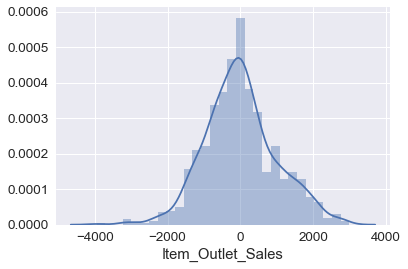

In [119]:
Residuals = Y_test - y_pred
sns.distplot(Residuals)

In [ ]:
#there is an assumption that residuals must be normally distributed and we successfully achieved that

In [120]:
rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
rmse

989.25601944538994

# NOW lets do preprocessing for test data also

In [121]:
Test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [122]:
Test.isnull().sum().sort_values(ascending= False)

Outlet_Size                  1606
Item_Weight                   976
Outlet_Type                     0
Outlet_Location_Type            0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Item_MRP                        0
Item_Type                       0
Item_Visibility                 0
Item_Fat_Content                0
Item_Identifier                 0
dtype: int64

In [123]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [124]:
Test.Outlet_Size.value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [125]:
#So filling the missing values with medium
Test["Outlet_Size"] = Test["Outlet_Size"].fillna('Medium')

In [126]:
#Item weight should be filled with mean since it a continuous value
Test['Item_Weight']=Test['Item_Weight'].fillna(Train['Item_Weight'].mean())

In [127]:
Test.isnull().sum().any()

False

In [128]:
num_data = Test._get_numeric_data()
num_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,20.750000,0.007565,107.8622,1999
1,8.300000,0.038428,87.3198,2007
2,14.600000,0.099575,241.7538,1998
3,7.315000,0.015388,155.0340,2007
4,12.857645,0.118599,234.2300,1985


In [129]:
Test.Outlet_Establishment_Year = pd.Categorical(Test.Outlet_Establishment_Year)

In [130]:
# Writing a function to find percentiles, min and max values of the attributes
def var_summary(x):
    return pd.Series([round(x.mean(),2), round(x.median(),2), round(x.min(),2), round(x.quantile(0.01),2), round(x.quantile(0.05),2), round(x.quantile(0.10),2),round(x.quantile(0.25),2),round(x.quantile(0.50),2),round(x.quantile(0.75),2), round(x.quantile(0.90),2),round(x.quantile(0.95),2),round(x.quantile(0.99),2),round(x.max(),2)], 
                  index=['MEAN','MEDIAN', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

#applying the above method to all numeric data
num_data.apply(lambda x: var_summary(x)).T

,MEAN,MEDIAN,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Item_Weight,12.72,12.86,4.56,5.17,6.12,6.83,9.20,12.86,15.85,19.00,20.10,20.85,21.35
Item_Visibility,0.07,0.05,0.00,0.00,0.00,0.01,0.03,0.05,0.09,0.14,0.16,0.24,0.32
Item_MRP,141.02,141.42,31.99,35.61,43.28,53.86,94.41,141.42,186.03,231.04,248.64,261.83,266.59
Outlet_Establishment_Year,1997.83,1999.00,1985.00,1985.00,1985.00,1985.00,1987.00,1999.00,2004.00,2009.00,2009.00,2009.00,2009.00


In [131]:
num_colss = num_data.drop(['Item_Weight',"Item_Visibility",'Outlet_Establishment_Year'],axis=1)


In [132]:
num_colss.columns

Index(['Item_MRP'], dtype='object')

In [133]:
test_cat= num_colss

In [134]:
cat_data = Test.drop(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_MRP', 'Outlet_Identifier'],axis =1)
cat_data.columns

Index(['Item_Type', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [135]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 5 columns):
Item_Type                    5681 non-null object
Outlet_Establishment_Year    5681 non-null category
Outlet_Size                  5681 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: category(1), object(4)
memory usage: 183.5+ KB


In [137]:
all_dummies=pd.concat([Final_Cat_Cols,cat_data],axis=0)

In [138]:
#now lets do dummies
dummies_concat =  pd.get_dummies(all_dummies, columns =['Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type','Item_Type','Outlet_Establishment_Year'],drop_first =True)

In [139]:
tt = dummies_concat[0:8523:]
test = dummies_concat[8524::]

In [140]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5680 entries, 1 to 5680
Data columns (total 30 columns):
Outlet_Size_Medium                 5680 non-null uint8
Outlet_Size_Small                  5680 non-null uint8
Outlet_Location_Type_Tier 2        5680 non-null uint8
Outlet_Location_Type_Tier 3        5680 non-null uint8
Outlet_Type_Supermarket Type1      5680 non-null uint8
Outlet_Type_Supermarket Type2      5680 non-null uint8
Outlet_Type_Supermarket Type3      5680 non-null uint8
Item_Type_Breads                   5680 non-null uint8
Item_Type_Breakfast                5680 non-null uint8
Item_Type_Canned                   5680 non-null uint8
Item_Type_Dairy                    5680 non-null uint8
Item_Type_Frozen Foods             5680 non-null uint8
Item_Type_Fruits and Vegetables    5680 non-null uint8
Item_Type_Hard Drinks              5680 non-null uint8
Item_Type_Health and Hygiene       5680 non-null uint8
Item_Type_Household                5680 non-null uint8
Item_Type_Mea

In [141]:
test.isnull().sum().sort_values(ascending= False)

Outlet_Establishment_Year_2009     0
Outlet_Establishment_Year_2007     0
Outlet_Size_Small                  0
Outlet_Location_Type_Tier 2        0
Outlet_Location_Type_Tier 3        0
Outlet_Type_Supermarket Type1      0
Outlet_Type_Supermarket Type2      0
Outlet_Type_Supermarket Type3      0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Establishment_Year_1987     0
Outlet_Establishment_Year_1997     0
Outlet_Establishment_Year_1998     0
Outlet_Establishment_Year_1999     0
O

In [142]:
#As we completed preprocessing for train now lets concat numaric and categorical attrebutes
final1 = pd.concat([test_cat,test], axis =1)
final1.columns

Index(['Item_MRP', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Establishment_Year_1987',
       'Outlet_Establishment_Year_1997', 'Outlet_Establishment_Year_1998',
       'Outlet_Establishment_Year_1999', 'Outlet_Establishment_Year_2002',
       'Outlet_Establishment_Year_2004', 'Outlet_Establishment_Year_2007',
       'Outlet_Establishment_Year_2009'],
      dtype='object')

# Lets do PCA for all the models

In [143]:
# To use PCA we need  missing values and outliers traetmeny dataset.So that we know important attributes to build all models

In [144]:
bigmart = pd.concat([num_col,cat_col],axis = 1)

In [145]:
martsales =pd.get_dummies(bigmart)

In [147]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [148]:
scaler = StandardScaler()
scaler.fit(martsales)                
train_t = scaler.transform(martsales)

In [149]:
x = martsales.drop(['Item_Outlet_Sales'],axis = 1)
y = martsales.Item_Outlet_Sales

In [164]:
pca_mart = PCA(0.9999996)
X_fit = pca_mart.fit_transform(x)
print (x.shape, X_fit.shape)
print (np.sum(pca_mart.explained_variance_ratio_))

(8523, 1612) (8523, 1560)
0.999999616553


# Linear Regression

In [165]:
from sklearn.linear_model import LinearRegression
X_train = X_fit
Y_train = y

In [166]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [167]:
X_train , X_test, Y_train, Y_test = train_test_split(
        X_fit,
        y,
        test_size=0.20,
        random_state=123)

In [168]:
y_pred = linreg.predict(X_test)

In [169]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
rmse

897.25106428509594

In [170]:
 metrics.r2_score(Y_test, y_pred)

0.66261245267714586

# decission tree

In [171]:
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor, export_graphviz, export 
from sklearn.grid_search import GridSearchCV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [172]:
X_train = X_fit 
Y_train = y

In [173]:
depth_list = list(range(1,20))
for depth in depth_list:
    dt_obj = DecisionTreeRegressor(max_depth=depth)
    dt_obj.fit(X_train, Y_train)
    print ('depth:', depth, 'R_squared:', metrics.r2_score(Y_test, dt_obj.predict(X_test)))

depth: 1 R_squared: 0.239029934927
depth: 2 R_squared: 0.469840674527
depth: 3 R_squared: 0.553660490398
depth: 4 R_squared: 0.602582572081
depth: 5 R_squared: 0.627233636384
depth: 6 R_squared: 0.644453409995
depth: 7 R_squared: 0.65831876923
depth: 8 R_squared: 0.68434415933
depth: 9 R_squared: 0.711096088025
depth: 10 R_squared: 0.743243689709
depth: 11 R_squared: 0.771684109653
depth: 12 R_squared: 0.807183099983
depth: 13 R_squared: 0.832749453893
depth: 14 R_squared: 0.853777557824
depth: 15 R_squared: 0.876145869976
depth: 16 R_squared: 0.891166819897
depth: 17 R_squared: 0.906763757638
depth: 18 R_squared: 0.92155885748
depth: 19 R_squared: 0.932667625881


In [174]:
param_grid = {'max_depth': np.arange(3,20)}
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=10)
tree.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [175]:
tree.best_params_

{'max_depth': 5}

In [176]:
tree.best_score_

0.6028827424266291

In [183]:
tree_final = DecisionTreeRegressor(max_depth=6)
tree_final.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [184]:
tree_test_pred = pd.DataFrame({'actual': Y_test, 'predicted': tree_final.predict(X_test)})

In [185]:
metrics.r2_score(Y_test, tree_test_pred.predicted)

0.64445340999496414

# Random forest

In [186]:
from sklearn.ensemble import RandomForestRegressor
X_train = X_fit
Y_train = y

In [187]:
depth_list = list(range(1,20))
for depth in depth_list:
    dt_obj = RandomForestRegressor(max_depth=depth)
    dt_obj.fit(X_train, Y_train)
    print ('depth:', depth, 'R_Squared:', metrics.r2_score(Y_test, dt_obj.predict(X_test)))

depth: 1 R_Squared: 0.241301931977
depth: 2 R_Squared: 0.473214186121
depth: 3 R_Squared: 0.557915566329
depth: 4 R_Squared: 0.610811355428
depth: 5 R_Squared: 0.632445728252
depth: 6 R_Squared: 0.652665962612
depth: 7 R_Squared: 0.676339719889
depth: 8 R_Squared: 0.690042678722
depth: 9 R_Squared: 0.730209780739
depth: 10 R_Squared: 0.761517951135
depth: 11 R_Squared: 0.781488979977
depth: 12 R_Squared: 0.811321668614
depth: 13 R_Squared: 0.829673471401
depth: 14 R_Squared: 0.854150853987
depth: 15 R_Squared: 0.864082628375
depth: 16 R_Squared: 0.878214116602
depth: 17 R_Squared: 0.885517604117
depth: 18 R_Squared: 0.89512666226
depth: 19 R_Squared: 0.904623320447


In [188]:
from sklearn.grid_search import GridSearchCV
radm_reg = GridSearchCV(estimator=RandomForestRegressor(),
                        param_grid =param_grid,
                        cv=5,
                  verbose=True, n_jobs=-1)

In [189]:
radm_reg.get_params()

{'cv': 5,
 'error_score': 'raise',
 'estimator': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=False),
 'estimator__bootstrap': True,
 'estimator__criterion': 'mse',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 10,
 'estimator__n_jobs': 1,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'fit_params': {

In [190]:
radm_reg = RandomForestRegressor(oob_score=True,n_estimators=100)
radm_reg.fit( X_train, Y_train )

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [191]:
radm_test_pred = pd.DataFrame( { 'actual':  Y_test,
                            'predicted': radm_reg.predict( X_test ) } )

In [192]:
metrics.r2_score( radm_test_pred.actual, radm_test_pred.predicted )

0.9425496398052452

# Bagging

In [193]:
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

In [195]:
param_bag = {'n_estimators': list(range(100, 801, 100)),
             }

In [196]:
from sklearn.grid_search import GridSearchCV
bag_reg = GridSearchCV(estimator=BaggingRegressor(),
                  param_grid=param_bag,
                  cv=5,
                  verbose=True, n_jobs=-1)

In [198]:
bag_reg.get_params()

{'cv': 5,
 'error_score': 'raise',
 'estimator': BaggingRegressor(base_estimator=None, bootstrap=True,
          bootstrap_features=False, max_features=1.0, max_samples=1.0,
          n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
          verbose=0, warm_start=False),
 'estimator__base_estimator': None,
 'estimator__bootstrap': True,
 'estimator__bootstrap_features': False,
 'estimator__max_features': 1.0,
 'estimator__max_samples': 1.0,
 'estimator__n_estimators': 10,
 'estimator__n_jobs': 1,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'fit_params': {},
 'iid': True,
 'n_jobs': -1,
 'param_grid': {'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'scoring': None,
 'verbose': True}

In [199]:
X_train = X_fit
Y_train = y

In [ ]:
bag_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [ ]:
bag_reg.best_params_

In [ ]:
bagregm = BaggingRegressor(oob_score=True, n_estimators=400)
bagregm.fit(X_train, Y_train)

In [ ]:
y_pred = pd.DataFrame( { 'actual':  Y_test,
                            'predicted': bagreg.predict( X_test) } )

In [ ]:
bagreg.estimators_features_

In [ ]:
metrics.r2_score(y_pred.actual, y_pred.predicted)

# Ada boost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [ ]:
paragrid_ada = {'n_estimators': [100, 200, 400, 600, 800],
               'learning_rate': [10**x for x in range(-3, 3)]}

In [ ]:
from sklearn.grid_search import GridSearchCV
ada = GridSearchCV(estimator=AdaBoostRegressor(),
                  param_grid=paragrid_ada,
                  cv=5,
                  verbose=True, n_jobs=-1)

In [ ]:
X_train = X_fit
Y_train = y

In [ ]:
ada.fit(X_train, Y_train)

In [ ]:
ada.best_params_

In [ ]:
ada_clf = AdaBoostRegressor(learning_rate=1, n_estimators=600)

In [ ]:
ada_clf.fit(X_train, Y_train)

In [ ]:
ada_test_pred = pd.DataFrame({'actual': Y_test,
                            'predicted': ada_clf.predict(X_test)})

In [ ]:
metrics.r2_score(ada_test_pred.actual, ada_test_pred.predicted)